https://sdv.dev/SDV/user_guides/timeseries/par.html

# Load Data

In [1]:
from sdv.demo import load_timeseries_demo

In [2]:
# sdvライブラリの時系列データのデモからデータセットをロードする
data = load_timeseries_demo()

In [3]:
data.head()

,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,AAPL,2018-12-31,39.632500,39.435001,140014000,7.378734e+11,Technology,Computer Manufacturing
1,AAPL,2019-01-02,38.722500,39.480000,148158800,7.378734e+11,Technology,Computer Manufacturing
2,AAPL,2019-01-03,35.994999,35.547501,365248800,7.378734e+11,Technology,Computer Manufacturing
3,AAPL,2019-01-04,36.132500,37.064999,234428400,7.378734e+11,Technology,Computer Manufacturing
4,AAPL,2019-01-07,37.174999,36.982498,219111200,7.378734e+11,Technology,Computer Manufacturing


In [4]:
print(f'data size: {data.shape}')
print(f'銘柄数:{len(set(data.Symbol))}')

data size: (25784, 8)
銘柄数:103


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'stock chart [open]')

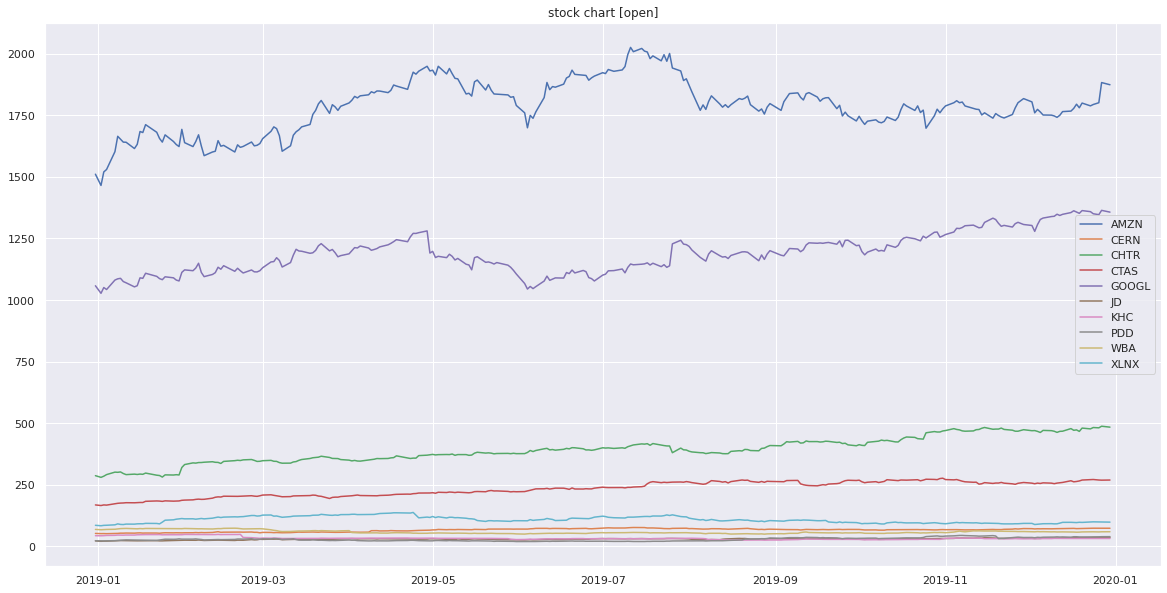

In [6]:
import random
random.seed(0)

# 銘柄をサンプリングして可視化する
N = 10
symbol_sample = random.sample(list(set(data.Symbol)), N)

# 開始値の可視化
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
for i, v in data.query('Symbol in @symbol_sample').groupby('Symbol'):
    ax.plot(v.Date, v.Open, label=i)

ax.legend()
ax.set_title('stock chart [open]')

# Modeling

In [7]:
# Entityカラムの定義
entity_columns = ['Symbol']
# Contextカラムの定義
context_columns = ['MarketCap', 'Sector', 'Industry']
# シーケンスの定義
sequence_index = 'Date'

In [8]:
# ローカルのCPU環境で検証するため、データ量を削減
from sdv.timeseries import PAR

model = PAR(
    entity_columns=entity_columns,
    context_columns=context_columns,
    sequence_index=sequence_index,
)
model.fit(data.query('Symbol in @symbol_sample'))

/usr/local/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
/usr/local/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Pl

# Generate Data

In [9]:
# 5つシーケンス(銘柄)を生成する
seq_sample = model.sample(num_sequences=5)

In [10]:
print(f"""
サンプリング銘柄: {symbol_sample}
生成した銘柄: {list(set(seq_sample.Symbol))}
""")


サンプリング銘柄: ['CERN', 'JD', 'KHC', 'XLNX', 'PDD', 'CTAS', 'CHTR', 'GOOGL', 'WBA', 'AMZN']
生成した銘柄: ['iTJWHK', 'nJQTWH', 'iWKGXPQGWUU', 'zTAEDOP', 'pGB']



In [11]:
import numpy as np

# 可視化で始値の軸を揃えるため
open_max = np.max([data.query('Symbol in @symbol_sample').Open.max(), seq_sample.Open.max()])
open_min = np.min([data.query('Symbol in @symbol_sample').Open.min(), seq_sample.Open.min()])

Text(0.5, 1.0, 'stock chart [synthetic data]')

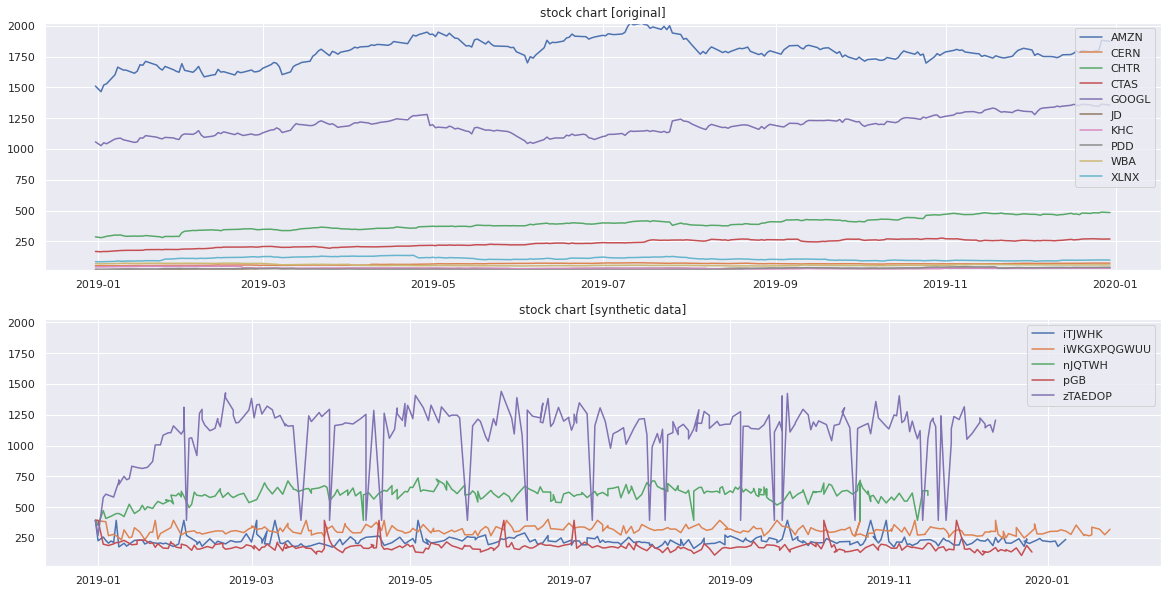

In [12]:
# 擬似生成したシーケンス
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(211)
for i, v in data.query('Symbol in @symbol_sample').groupby('Symbol'):
    ax1.plot(v.Date, v.Open, label=i)
ax1.set_ylim(open_min, open_max)
ax1.legend()
ax1.set_title('stock chart [original]')

ax2 = fig.add_subplot(212)
for i, v in seq_sample.groupby('Symbol'):
    ax2.plot(v.Date, v.Open, label=i)
ax2.set_ylim(open_min, open_max)
ax2.legend()
ax2.set_title('stock chart [synthetic data]')